In [11]:
# Install TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


In [13]:
# Additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [14]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)

x_train.shape:  (60000, 28, 28)


In [15]:
# the data is only 2D
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [16]:
# number of classes
K = len(set(y_train))
print("number of classes: ", K)

number of classes:  10


In [17]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [29]:
# Compile and fit
# Note: make sure you are using the GPU for this
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0798 - accuracy: 0.9700 - val_loss: 0.5396 - val_accuracy: 0.8961
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0782 - accuracy: 0.9718 - val_loss: 0.4885 - val_accuracy: 0.8988
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0768 - accuracy: 0.9716 - val_loss: 0.5241 - val_accuracy: 0.9005
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0774 - accuracy: 0.9726 - val_loss: 0.4942 - val_accuracy: 0.9038
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0721 - accuracy: 0.9740 - val_loss: 0.5315 - val_accuracy: 0.8976
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0724 - accuracy: 0.9746 - val_loss: 0.5126 - val_accuracy: 0.8996
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0706 - accuracy: 0.9746 - val_loss: 0.5348 - val_ac

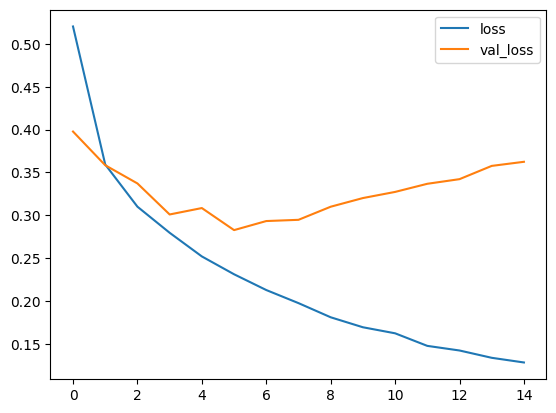

In [19]:
# Plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

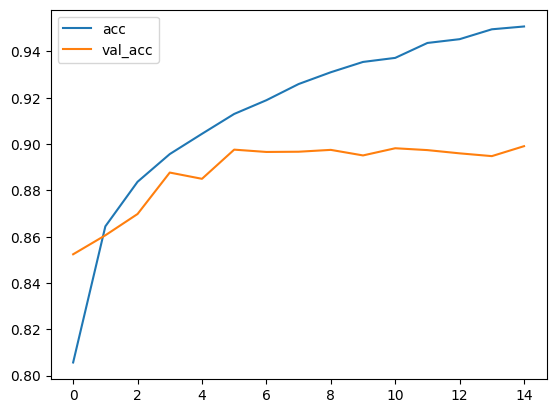

In [20]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [25]:
print('Num GPUs Available: ', len(tf.config.experimental.list_physical_devices('GPU')))
print('GPUs name: ', tf.test.gpu_device_name())

Num GPUs Available:  1
GPUs name:  /device:GPU:0


In [27]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]